<a href="https://colab.research.google.com/github/imprincesarraf/Deep-Learning/blob/main/Deep_Learning_ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [96]:
#import some basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [97]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [98]:
#Exited is dependent feature rest are independent feature
#Divide the dataset into dependent and dependent feature
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [99]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [100]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [101]:
#feature engineering
pd.get_dummies(X['Geography'])


,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [102]:
#feature engineering
#drop_first=True using 2 column to represent 3 column itself
pd.get_dummies(X['Geography'],drop_first=True)



,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [103]:
#feature eng
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [104]:
#Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [105]:
X=pd.concat([X,geography,gender],axis=1)


In [106]:
#Splitting the datset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [107]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [108]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [109]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [110]:
X_train.shape

(8000, 11)

In [111]:
##Part 2 lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [112]:
###Lets initialize the ANN 
classifier=Sequential()


In [113]:
#Adding the input layer
classifier.add(Dense(units=11,activation='ReLU'))


In [114]:
#Adding the first hidden layer
classifier.add(Dense(units=7,activation='ReLU'))
classifier.add(Dropout(.2))


In [115]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='ReLU'))
classifier.add(Dropout(.3))



In [116]:
#Adding the output hidden layer
classifier.add(Dense(1,activation='sigmoid'))


In [117]:
#the entire neural network is ready
#quickly train entire neural network
classifier.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
#or
#classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=["accuracy"])

In [118]:
#import tensorflow
#opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
#model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=1000)



In [119]:
##Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [120]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5707 - accuracy: 0.7404 - val_loss: 0.4682 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4836 - accuracy: 0.7996 - val_loss: 0.4422 - val_accuracy: 0.8114


In [121]:
model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

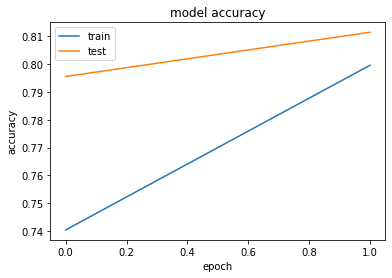

In [122]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

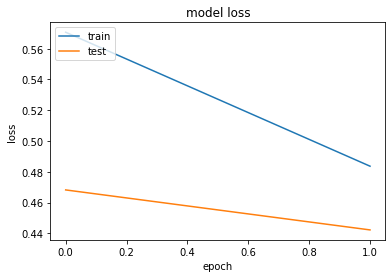

In [123]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [124]:
#Part 3-Making the predictions and evaluating the model
#Predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=.5)


63/63 [==============================] - 0s 1ms/step


In [125]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [126]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [127]:
##Make the confusion matrix
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1583   12]
 [ 350   55]]


In [128]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score


0.819

In [129]:
classifier.get_weights()

[array([[-0.40988374, -0.43791884,  0.156499  ,  0.08941653, -0.05112978,
          0.3293692 , -0.31257463, -0.3136892 , -0.3467415 , -0.23041841,
         -0.04885722],
        [ 0.17351273,  0.17783448, -0.41135985,  0.5123441 , -0.43724114,
          0.42006072, -0.20658523,  0.40698016, -0.35292748,  0.32814693,
         -0.7852571 ],
        [ 0.14352265, -0.211935  , -0.2299255 ,  0.3446103 , -0.28646198,
          0.18108673,  0.31226948, -0.17712943, -0.07270934,  0.4063958 ,
          0.43378294],
        [ 0.05343554,  0.09047043, -0.35558587,  0.06949004, -0.11891956,
          0.2632207 , -0.04886484,  0.3482316 ,  0.2917366 , -0.4006362 ,
          0.22075452],
        [-0.45871878, -0.01673813,  0.17856608, -0.36029983, -0.16262689,
          0.263878  ,  0.12171548, -0.41810617, -0.17964217, -0.08724371,
         -0.15129286],
        [-0.22016625, -0.44224486,  0.09085052,  0.39934132, -0.21141529,
          0.37466052, -0.25406522, -0.3398871 , -0.07997825,  0.1904304